In [1]:
# Let's implement PCA from scratch
import pandas as pd
from sklearn import preprocessing
import numpy as np
import plotly.graph_objects as go

scaler = preprocessing.StandardScaler() # essential for PCA (does (x-mean) / std)

%matplotlib notebook

# get data
PATH = './data/Country-data.csv'

data_df = pd.read_csv(PATH)
data_df = data_df.set_index("country")
data_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [2]:
# Center at 0 and scale in terms of stds
data = scaler.fit_transform(data_df.to_numpy())
data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

In [3]:
# Some functions we will need 
def covariance(vec1, vec2):
    # Since we centered to have mean 0, covariance formula is simplified
    return (1/(len(vec1)-1))*np.sum((vec1)*(vec2))
    

In [15]:
# First we calculate covariance matrix for all our features
num_features = len(data_df.columns)

cov_matrix = np.zeros((num_features, num_features))
for i in range(num_features):
    for j in range(num_features):
        if i == j: # along main diagonal Cov(a,a) = variance(a)
            #cov_matrix[i][j] = np.var(data[:, i])
            cov_matrix[i][j] = 1 # we don't have to compute variance because we did x - mean / std, so std = 1 and variance = 1 since variance = std*std
        else:
            cov_matrix[i][j] = covariance(data[:, i], data[:, j])

# Now compute eigenvalues and eigenvectors of covariance matrix
evalues, evectors = np.linalg.eig(cov_matrix)
sort_ind = np.argsort(evalues)[::-1]

evalues = evalues[sort_ind]
evectors = evectors[sort_ind]

print('How much of the variance we can capture by having n PCs:')
contributions = evalues/9
print(contributions)

# Create feature vector with selected number of components we want to keep, let's do 3
feature_vec = np.transpose(evectors[0:3])
print('our projection vectors (per column) in a matrix')
print(feature_vec)

# Recast data to PC axes
new_data = data @ feature_vec
print(new_data.shape)

How much of the variance we can capture by having n PCs:
[0.46161623 0.17218195 0.13015663 0.11052813 0.07317495 0.02432266
 0.01201089 0.00920259 0.00680597]
our projection vectors (per column) in a matrix
[[ 0.41951945 -0.28389698 -0.15083782]
 [-0.19288394 -0.61316349  0.24308678]
 [ 0.02954353 -0.14476069  0.59663237]
 [-0.37065326 -0.00309102 -0.4618975 ]
 [-0.16896968  0.05761584  0.51800037]
 [-0.20062815  0.05933283 -0.00727646]
 [-0.3275418   0.12308207 -0.11308797]
 [-0.68274306 -0.01419742  0.07249683]
 [-0.07948854 -0.70730269 -0.24983051]]
(167, 3)


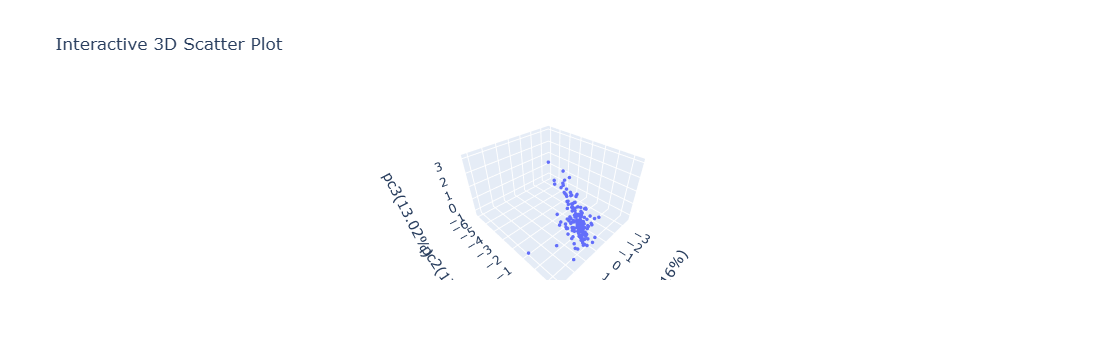

In [22]:
fig = go.Figure(data=[go.Scatter3d(x=new_data[:, 0], y=new_data[:, 1], z=new_data[:, 2], mode='markers',
                                  marker=dict(size=2))])

fig.update_layout(
    scene=dict(
        xaxis_title=f'pc1({contributions[0]*100:.2f}%)',
        yaxis_title=f'pc2({contributions[1]*100:.2f}%)',
        zaxis_title=f'pc3({contributions[2]*100:.2f}%)'
    ),
    title='Interactive 3D Scatter Plot'
)

fig.show()

In [ ]:
# compare manual implementation to sci kit learn and see if its good